### Introduction

This workbook is the class material for the class on - Sets , Venn Diagram and Probability using Python 

In [9]:
import os   
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from matplotlib.patches import Circle, Rectangle

In [12]:
# Read the CSV file into a DataFrame    
data = pd.read_csv('sample_accounts.csv')
# Display the DataFrame 
print(data.head(10))  # Display the first 10 rows

         acct_no  use_debit  use_upi
0  acct_71754622          1        1
1  acct_28246313          0        0
2  acct_58713350          0        1
3  acct_48827630          0        0
4  acct_96005559          1        1
5  acct_20820733          1        0
6  acct_59773220          0        0
7  acct_29586557          0        1
8  acct_27052246          1        0
9  acct_66098222          1        1


In [13]:
# -----------------------------
# 1. Select a single random row
# -----------------------------
random_row = data.sample(n=1)  
print("\nRandom Single Row:\n", random_row)


Random Single Row:
            acct_no  use_debit  use_upi
248  acct_62887574          1        0


In [14]:
# -----------------------------
# 1. Select a single random row, with reproducibility
# -----------------------------
random_row = data.sample(n=1, random_state=42)  # random_state ensures reproducibility
print("\nRandom Single Row:\n", random_row)


Random Single Row:
            acct_no  use_debit  use_upi
521  acct_11417447          1        0


In [15]:
# Count # of acct using debit card
debit_count = data['use_debit'].sum()
print(f"\nNumber of accounts using debit card: {debit_count}")


Number of accounts using debit card: 496


In [16]:
# Count # of acct using upi 
upi_count = data['use_upi'].sum()
print(f"\nNumber of accounts using upi: {upi_count}")


Number of accounts using upi: 497


In [20]:
# Count # of acct using upi and debit card  
both_count = data[(data['use_debit'] == 1) & (data['use_upi'] == 1)].shape[0]
print(f"\nNumber of accounts using both debit card and upi: {both_count}")


Number of accounts using both debit card and upi: 240


In [21]:
# Count # of acct using neither  debit card nor upi 
neither_count = data[(data['use_debit'] == 0) & (data['use_upi'] == 0)].shape[0]
print(f"\nNumber of accounts using neither debit card nor upi: {neither_count}")


Number of accounts using neither debit card nor upi: 247


In [22]:
# Count # of acct  debit card BUT NOT upi
debit_not_upi_count = data[(data['use_debit'] == 1) & (data['use_upi'] == 0)].shape[0]
print(f"\nNumber of accounts using debit card but NOT upi: {debit_not_upi_count}")


Number of accounts using debit card but NOT upi: 256


In [23]:
# Count # of acct  UPI BUT NOT debit card
upi_not_debit_count = data[(data['use_debit'] == 0) & (data['use_upi'] == 1)].shape[0]
print(f"\nNumber of accounts using UPI but NOT debit card: {upi_not_debit_count}")


Number of accounts using UPI but NOT debit card: 257


{'Neither_Count': 247, 'only_debit': 256, 'both': 240, 'only_upi': 257, 'N': 1000}


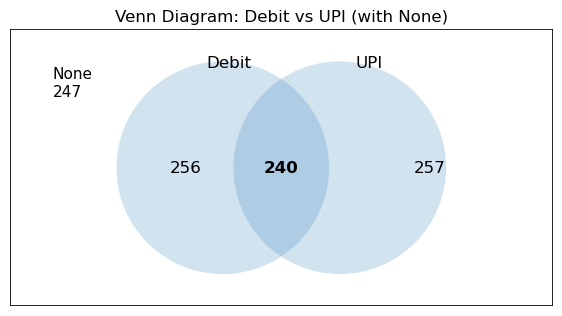

In [25]:
     
# # ---- 2) Compute the four regions ----
N = len(data)

print({"Neither_Count": neither_count, "only_debit": debit_not_upi_count, "both": both_count, "only_upi": upi_not_debit_count , "N": N})

# ---- 3) Plot helper (Venn with "none" outside) ----
def plot_venn_debit_upi(only_debit, only_upi, both, none, show_percent=True):
    fig, ax = plt.subplots(figsize=(7, 4.5))

    # Background box to place "none"
    ax.add_patch(Rectangle((-2.0, -1.3), 5.1, 2.6, fill=False, lw=1.2))

    # Two overlapping circles
    c1 = Circle((0, 0), 1.0, alpha=0.20)         # Debit
    c2 = Circle((1.1, 0), 1.0, alpha=0.20)       # UPI
    ax.add_patch(c1); ax.add_patch(c2)

    # Counts & optional percents formatter
    total = only_debit + only_upi + both + none
    def fmt(x):
        if show_percent and total > 0:
            return f"{x}\n({x/total:.1%})"
        return f"{x}"

    # Place texts: left lens, intersection, right lens
    ax.text(-0.35, 0, fmt(only_debit), ha="center", va="center", fontsize=12)
    ax.text(0.55,  0, fmt(both),       ha="center", va="center", fontsize=12, fontweight="bold")
    ax.text(1.95,  0, fmt(only_upi),   ha="center", va="center", fontsize=12)

    # "None" region outside the circles (top-left corner of box)
    ax.text(-1.6, 0.8, "None\n" + fmt(none), ha="left", va="center", fontsize=11)

    # Labels
    ax.text(-0.15, 0.95, "Debit", fontsize=12)
    ax.text(1.25,  0.95, "UPI",   fontsize=12)

    # Cosmetics
    ax.set_xlim(-2.0, 3.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("Venn Diagram: Debit vs UPI (with None)")
    plt.show()

# ---- 4) Draw it ----
plot_venn_debit_upi(debit_not_upi_count, upi_not_debit_count, both_count, neither_count, show_percent=False)
